# Problem statement 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

    Which variables are significant in predicting the price of a house, and

    How well those variables describe the price of a house.

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# lets import all python librarires for data analysis
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to remove the warning add filter warning
warnings.filterwarnings('ignore')

import re

#Sklearn libraries to built regression model ,do grid search  and stnadardize the values of each feature
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [2]:
# read the csv file and store it into the dataframe
price= pd.read_csv('train.csv')

In [3]:
price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#lets check the numerical variables and how they are spreaded with the help of quartiles
price.describe(percentiles=[0.10,0.25,0.50,0.75,0.85,0.90,0.95]).T

,count,mean,std,min,10%,25%,50%,75%,85%,90%,95%,max
Id,1460.0,730.500000,421.610009,1.0,146.9,365.75,730.5,1095.25,1241.15,1314.1,1387.05,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,20.00,50.0,70.00,90.00,120.0,160.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,44.0,59.00,69.0,80.00,90.00,96.0,107.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,5000.0,7553.50,9478.5,11601.50,13161.10,14381.7,17401.15,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,5.00,6.0,7.00,8.00,8.0,8.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.0,5.00,5.0,6.00,7.00,7.0,8.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1924.9,1954.00,1973.0,2000.00,2005.00,2006.0,2007.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1950.0,1967.00,1994.0,2004.00,2006.00,2006.0,2007.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.00,0.0,166.00,262.35,335.0,456.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.0,0.00,383.5,712.25,929.45,1065.5,1274.00,5644.0


In [5]:
#lets check the all columns datatype and its value information
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
#check the shape of dataframe
price.shape

(1460, 81)

In [7]:
#check howmany null values are there in each columns
price.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [8]:
#lets find the percentage wise count of empty values in each columns
round((price.isnull().sum()/len(price.index))*100,2).sort_values(ascending=False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Utilities        0.00
dtype: float64

# Data cleaning :

we can see that there are so many null values in so many columns so we need to clean the data accordingly

In [9]:
#lets check if there are any duplicate records present in the dataset

price.Id.nunique()

1460

In [10]:
# we can see that 'PoolQC','Fence','MiscFeature','FireplaceQu','Alley' has large number of null values 
#and it has not much variance so we should drop all these columns

drop_columns=['PoolQC','Fence','MiscFeature','FireplaceQu','Alley']

In [11]:
price= price.drop(drop_columns, axis=1)

In [12]:
# check the shape of the dataset after dropping the columns
price.shape

(1460, 76)

In [13]:
#check the percentage wise null value columns again
round((price.isnull().sum()/len(price.index))*100,2).sort_values(ascending=False).head(20)

LotFrontage     17.74
GarageFinish     5.55
GarageType       5.55
GarageCond       5.55
GarageQual       5.55
GarageYrBlt      5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
RoofStyle        0.00
RoofMatl         0.00
SalePrice        0.00
Exterior1st      0.00
Exterior2nd      0.00
YearBuilt        0.00
dtype: float64

In [14]:
#lets find the unique values in each columns 
price.describe(include='all').loc['unique', :].sort_values(ascending=True).head(20)

Street          2
Utilities       2
CentralAir      2
GarageFinish    3
PavedDrive      3
LandSlope       3
MasVnrType      4
BsmtCond        4
BsmtExposure    4
KitchenQual     4
BsmtQual        4
LandContour     4
LotShape        4
ExterQual       4
Electrical      5
GarageQual      5
HeatingQC       5
GarageCond      5
MSZoning        5
ExterCond       5
Name: unique, dtype: object

In [15]:
# check the unique values in each categorical variable individually
price.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [16]:
price.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [17]:
price.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [18]:
price.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [19]:
price.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [20]:
price.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

From the above analysis it is clear that 'Utilities','Street','CentralAir','PavedDrive','LandSlope' has very
low variance so it will not be helpful for prediction so we can drop these columns

In [21]:
# from the above analysis it is clear that 'Utilities','Street','CentralAir','PavedDrive','LandSlope' has very
#low variance so it will not be helpful for prediction so we can drop these columns
col2=['Utilities','Street','CentralAir','PavedDrive','LandSlope']

In [22]:
price= price.drop(col2, axis=1)

In [23]:
price.shape

(1460, 71)

In [24]:
round((price.isnull().sum()/len(price.index))*100,2).sort_values(ascending=False).head(15)

LotFrontage     17.74
GarageFinish     5.55
GarageType       5.55
GarageYrBlt      5.55
GarageCond       5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Exterior1st      0.00
dtype: float64

# Data imputation technique

In [25]:
# we can see that LotFrontage is significant variable so we need to fill the null value with median
med=int(price.LotFrontage.median())

In [26]:
price['LotFrontage']= price['LotFrontage'].fillna(med)

In [27]:
round((price.isnull().sum()/len(price.index))*100,2).sort_values(ascending=False).head(15)

GarageType      5.55
GarageYrBlt     5.55
GarageCond      5.55
GarageQual      5.55
GarageFinish    5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
Exterior1st     0.00
RoofMatl        0.00
dtype: float64

In [28]:
price.shape

(1460, 71)

In [29]:
# there are other significant variables as well those we need to fill with some values

cols=['GarageType','GarageCond','GarageQual','GarageFinish','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType']

In [30]:
price[cols]= price[cols].fillna('None')

In [31]:
# fill the GarageYrBlt and MasVnrArea numerical variables with '0' values

price['GarageYrBlt']= price['GarageYrBlt'].fillna(0)
price['MasVnrArea']= price['MasVnrArea'].fillna(0)

In [32]:
# check the pecentage wise null values in each columns
round((price.isnull().sum()/len(price.index))*100,2).sort_values(ascending=False).head(5)

Electrical     0.07
SalePrice      0.00
Foundation     0.00
Exterior1st    0.00
Exterior2nd    0.00
dtype: float64

In [33]:
#lets check the electrical variable with the unique values
price.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [34]:
# as we can see that it has 4 unique values so lets fill null value wirh most repeated value SBrkr
price['Electrical']= price['Electrical'].fillna('SBrkr')

In [35]:
# we have cleaned the data completely lets check further
round((price.isnull().sum()/len(price.index))*100,2).sort_values(ascending=False).head(5)

SalePrice      0.0
Foundation     0.0
Exterior1st    0.0
Exterior2nd    0.0
MasVnrType     0.0
dtype: float64

# Feature engineering (Create a new columns from the given columns)

In [36]:
#lets convert year built into number of years by subtracting it from current year and drop the year column
price['NoOFyearsOLd']=price.apply(lambda X:  2019 -X.YearBuilt  ,axis=1)

In [37]:
#like this we can convet last rebuilt year into the numbers by subtracting the year from the current year 
price['LastRebuilt']=price.apply(lambda X: 2019 - X.YearRemodAdd , axis=1)

In [38]:
#like this we can convet last rebuilt year into the numbers by subtracting the year from the current year 
price['GarageLastBuilt']=price.apply(lambda X: 2019 - X.GarageYrBlt , axis=1)


In [39]:

price.GarageLastBuilt[price.GarageLastBuilt==2019]=0

In [40]:
# we can convert year sold and month sold into the last sold howmany years ago by ( (MoSold/12) + (2019-YrSold) )
price['LastSold']=price.apply(lambda X : (2019-X.YrSold) + (X.MoSold/12) ,axis=1)

In [41]:
#convert LastSold column float values in 1 decimal point
price['LastSold']=price['LastSold'].round(1)

In [42]:
# so now we have converted year in the significant numeric columns so we will drop all these original columns
price=price.drop(['YearBuilt','YearRemodAdd','YrSold','MoSold','GarageYrBlt'], axis=1)

In [43]:
#few columns which is showing the total is not so much important so that we can drop those columns
price=price.drop(['TotalBsmtSF','TotRmsAbvGrd'],axis=1)

In [44]:
#id column is not useful for the model building hence we will drop this column as well
price=price.drop('Id',axis=1)

In [45]:
price.shape

(1460, 67)

In [46]:
price.describe(percentiles=[0.25,0.50,0.75,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,25%,50%,75%,95%,97%,98%,99%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,50.0,70.00,160.00,160.00,188.20,190.00,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.0,69.0,79.00,104.00,114.00,120.82,137.41,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.50,17401.15,21571.80,25251.62,37567.64,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,6.0,7.00,8.00,9.00,9.00,10.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.0,5.0,6.00,8.00,8.00,8.00,9.00,9.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.0,0.0,164.25,456.00,573.69,650.82,791.28,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.0,383.5,712.25,1274.00,1375.99,1442.64,1572.41,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.0,0.0,0.00,396.20,546.23,658.12,830.38,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.0,477.5,808.00,1468.00,1589.38,1678.20,1797.05,2336.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.0,1087.0,1391.25,1831.25,1981.61,2072.28,2219.46,4692.0


# Outlier analysis

There are few columns which has very high and very low values which make model prediction power low so we need to perform outlier analysis for those columns value. Lets perform outlier analysis

In [47]:
# create a function for removing outlier so that we do not need to perform this code each time
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.97)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [48]:
# lets remove the outliers from the below columns
price = remove_outlier(price,'LotFrontage')
price = remove_outlier(price,'LotArea')
price = remove_outlier(price,'MasVnrArea')
price = remove_outlier(price,'BsmtFinSF1')
price = remove_outlier(price,'1stFlrSF')
price = remove_outlier(price,'2ndFlrSF')
price = remove_outlier(price,'OpenPorchSF')
price = remove_outlier(price,'WoodDeckSF')
price = remove_outlier(price,'OpenPorchSF')
price = remove_outlier(price,'EnclosedPorch')
price = remove_outlier(price,'ScreenPorch')
price = remove_outlier(price,'MiscVal')
price = remove_outlier(price,'SalePrice')

In [49]:
# check the size of data in dataset after outlier
price.shape


(1433, 67)

In [50]:
price.describe(percentiles=[0.25,0.50,0.75,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,25%,50%,75%,95%,97%,98%,99%,max
MSSubClass,1433.0,56.988835,42.256382,20.0,20.0,50.0,70.0,160.0,160.00,180.00,190.00,190.0
LotFrontage,1433.0,69.431961,19.969593,21.0,60.0,69.0,79.0,103.0,110.04,120.00,130.00,182.0
LotArea,1433.0,9832.408234,4545.802595,1300.0,7500.0,9430.0,11475.0,16590.0,19299.28,21750.00,25885.04,46589.0
OverallQual,1433.0,6.094906,1.381515,1.0,5.0,6.0,7.0,8.0,9.00,9.00,10.00,10.0
OverallCond,1433.0,5.569435,1.110935,1.0,5.0,5.0,6.0,8.0,8.00,8.00,9.00,9.0
MasVnrArea,1433.0,101.880670,175.558639,0.0,0.0,0.0,164.0,448.8,567.16,650.00,770.72,1378.0
BsmtFinSF1,1433.0,434.510816,433.110453,0.0,0.0,377.0,706.0,1260.4,1361.32,1440.36,1567.00,2260.0
BsmtFinSF2,1433.0,45.789951,160.723668,0.0,0.0,0.0,0.0,393.0,546.04,650.76,835.24,1474.0
BsmtUnfSF,1433.0,571.210049,443.176738,0.0,227.0,484.0,811.0,1468.8,1594.36,1682.16,1798.40,2336.0
1stFlrSF,1433.0,1156.551989,373.882221,334.0,880.0,1082.0,1382.0,1817.0,1973.12,2070.44,2213.80,3228.0


In [51]:
# we can see that saleprice still has a outliers so change the quartile and remove outlier again from saleprice
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [52]:
price = remove_outlier(price,'SalePrice')

In [53]:
price.shape

(1430, 67)

In [54]:
price.describe(percentiles=[0.25,0.50,0.75,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,25%,50%,75%,95%,97%,98%,99%,max
MSSubClass,1430.0,56.982517,42.300489,20.0,20.00,50.0,70.00,160.00,160.00,180.00,190.00,190.0
LotFrontage,1430.0,69.310490,19.783328,21.0,60.00,69.0,79.00,102.00,110.00,120.00,130.00,182.0
LotArea,1430.0,9802.044056,4485.203724,1300.0,7500.00,9410.5,11453.50,16521.15,18843.94,21718.10,25323.63,46589.0
OverallQual,1430.0,6.086713,1.371317,1.0,5.00,6.0,7.00,8.00,9.00,9.00,9.00,10.0
OverallCond,1430.0,5.569930,1.111838,1.0,5.00,5.0,6.00,8.00,8.00,8.00,9.00,9.0
MasVnrArea,1430.0,100.312587,170.111274,0.0,0.00,0.0,163.75,442.55,562.26,635.36,764.84,1129.0
BsmtFinSF1,1430.0,431.969231,429.740122,0.0,0.00,375.0,703.50,1253.95,1339.56,1427.88,1559.17,2260.0
BsmtFinSF2,1430.0,45.886014,160.878581,0.0,0.00,0.0,0.00,393.75,546.13,651.72,835.78,1474.0
BsmtUnfSF,1430.0,571.127273,443.445335,0.0,225.50,483.5,811.00,1469.10,1595.17,1682.52,1798.55,2336.0
1stFlrSF,1430.0,1154.302797,370.805695,334.0,879.25,1081.0,1380.25,1800.55,1966.26,2048.94,2184.98,3228.0


In [55]:
# check all numerical columns
price_numeric = price.select_dtypes(include=['float64', 'int64'])
price_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,NoOFyearsOLd,LastRebuilt,GarageLastBuilt,LastSold
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,0,208500,16,16,16.0,11.2
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,0,181500,43,43,43.0,12.4
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,0,223500,18,17,18.0,11.8
3,70,60.0,9550,7,5,0.0,216,0,540,961,...,272,0,0,0,0,140000,104,49,21.0,13.2
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,0,250000,19,19,19.0,12.0


# Data correaltion and Predictor variable distribution

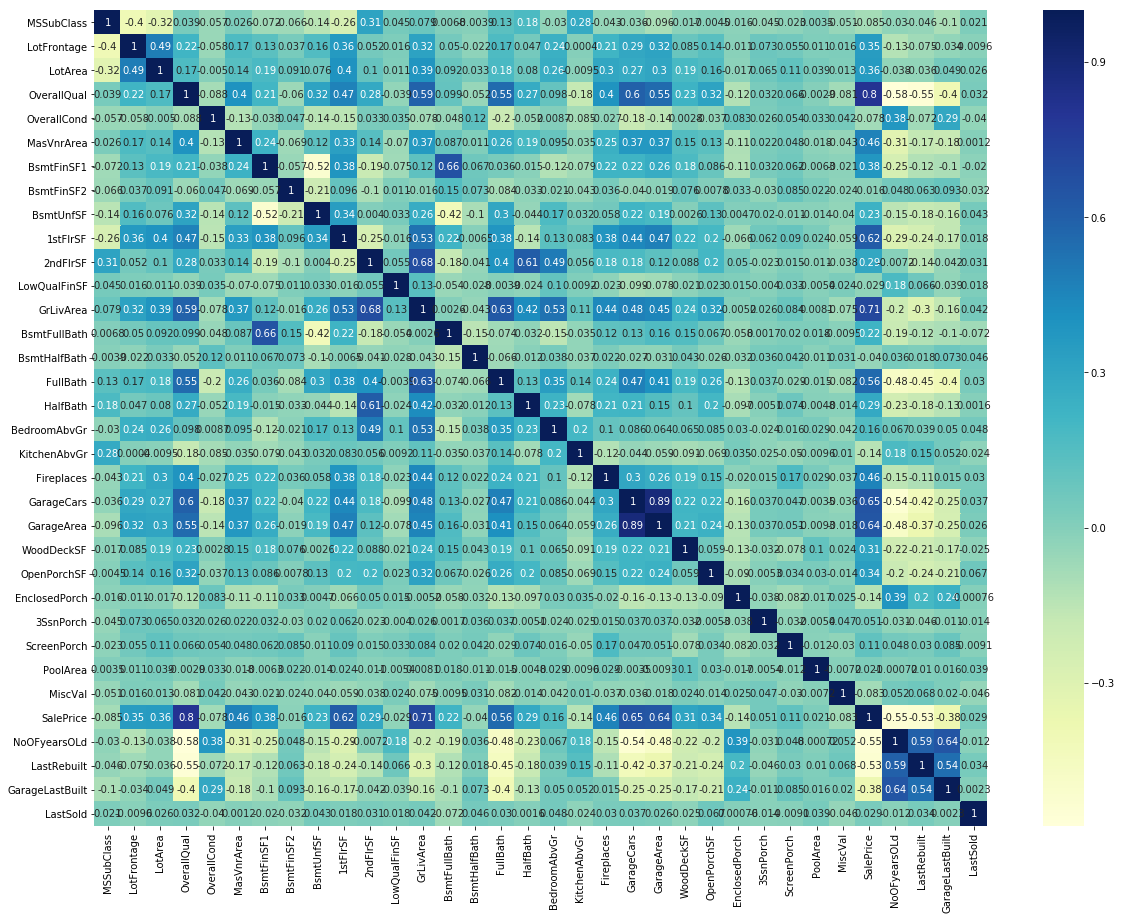

In [56]:
# check the correlation of each numerical variable with other variable using heatmap
plt.figure(figsize = (20, 15))
cor=price_numeric.corr()
sns.heatmap(cor,annot = True, cmap="YlGnBu")

In [57]:
# check all column names
price.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SaleType', 'SaleCondition', 'SalePrice', 'NoOFyearsOLd',
       'LastRebuil

In [58]:
col_log=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SaleType', 'SaleCondition', 'NoOFyearsOLd',
       'LastRebuilt', 'GarageLastBuilt', 'LastSold']

In [59]:
# lets check the skewness or distribution of SalePrice column which is predictor variable
from scipy import stats
from scipy.stats import norm, skew #for some statistics
(mu, sigma) = norm.fit(price['SalePrice'])



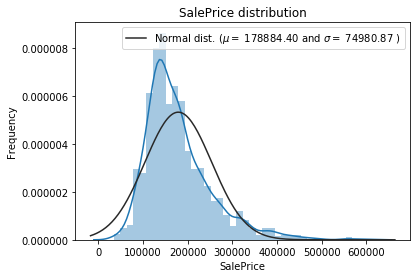

In [60]:
(mu, sigma) = norm.fit(price['SalePrice'])
sns.distplot(price['SalePrice'],fit=norm)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')

Fron the above graph it is clear that data are skewed so we need to convert it into normal distribution

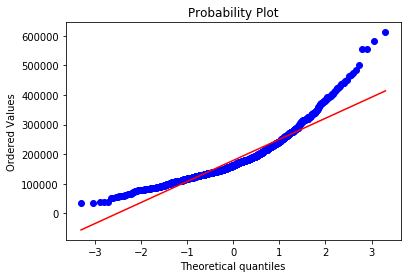

In [61]:
# check the linearity of target variable
quantile_plot=stats.probplot(price['SalePrice'], plot=plt)

In [62]:
# to convert it into normal distribution lets convert SalePrice into logarithmic form so that it will be 
#distributed normally
price["SalePrice"] = np.log1p(price["SalePrice"])
price['SalePrice'].head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [63]:
# to convert it into normal distribution lets convert other numerical variables into logarithmic form so that it will be 
#distributed normally
num_qw=price.select_dtypes(include=['int64','float64'])

In [64]:
#perform the log on all numerical columns
price[num_qw.columns] = np.log1p(price[num_qw.columns])

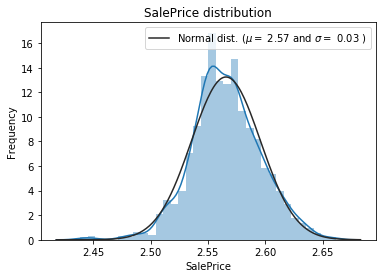

In [65]:
(mu, sigma) = norm.fit(price['SalePrice'])
sns.distplot(price['SalePrice'],fit=norm)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')

From the above graph it is clear that now the data are normlly distributed so we are good to do our next step

## Data preparation

In [66]:
#lets split the data into X and Y
x= price.loc[:,['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SaleType', 'SaleCondition', 'NoOFyearsOLd',
       'LastRebuilt', 'GarageLastBuilt', 'LastSold']]

In [67]:
y = pd.DataFrame(price['SalePrice'])


In [68]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,NoOFyearsOLd,LastRebuilt,GarageLastBuilt,LastSold
0,4.110874,RL,4.189655,9.042040,Reg,Lvl,Inside,CollgCr,Norm,Norm,...,0.0,0.0,0.0,0.0,WD,Normal,2.833213,2.833213,2.833213,2.501436
1,3.044522,RL,4.394449,9.169623,Reg,Lvl,FR2,Veenker,Feedr,Norm,...,0.0,0.0,0.0,0.0,WD,Normal,3.784190,3.784190,3.784190,2.595255
2,4.110874,RL,4.234107,9.328212,IR1,Lvl,Inside,CollgCr,Norm,Norm,...,0.0,0.0,0.0,0.0,WD,Normal,2.944439,2.890372,2.944439,2.549445
3,4.262680,RL,4.110874,9.164401,IR1,Lvl,Corner,Crawfor,Norm,Norm,...,0.0,0.0,0.0,0.0,WD,Abnorml,4.653960,3.912023,3.091042,2.653242
4,4.110874,RL,4.442651,9.565284,IR1,Lvl,FR2,NoRidge,Norm,Norm,...,0.0,0.0,0.0,0.0,WD,Normal,2.995732,2.995732,2.995732,2.564949


In [69]:
num_columns=x.select_dtypes(include=['int64','float64'])
num_columns.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,NoOFyearsOLd,LastRebuilt,GarageLastBuilt,LastSold
0,4.110874,4.189655,9.042040,2.079442,1.791759,5.283204,6.561031,0.0,5.017280,6.753438,...,4.127134,0.000000,0.0,0.0,0.0,0.0,2.833213,2.833213,2.833213,2.501436
1,3.044522,4.394449,9.169623,1.945910,2.197225,0.000000,6.886532,0.0,5.652489,7.141245,...,0.000000,0.000000,0.0,0.0,0.0,0.0,3.784190,3.784190,3.784190,2.595255
2,4.110874,4.234107,9.328212,2.079442,1.791759,5.093750,6.188264,0.0,6.075346,6.825460,...,3.761200,0.000000,0.0,0.0,0.0,0.0,2.944439,2.890372,2.944439,2.549445
3,4.262680,4.110874,9.164401,2.079442,1.791759,0.000000,5.379897,0.0,6.293419,6.869014,...,3.583519,5.609472,0.0,0.0,0.0,0.0,4.653960,3.912023,3.091042,2.653242
4,4.110874,4.442651,9.565284,2.197225,1.791759,5.860786,6.486161,0.0,6.196444,7.044033,...,4.442651,0.000000,0.0,0.0,0.0,0.0,2.995732,2.995732,2.995732,2.564949


In [70]:
num_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1459
Data columns (total 33 columns):
MSSubClass         1430 non-null float64
LotFrontage        1430 non-null float64
LotArea            1430 non-null float64
OverallQual        1430 non-null float64
OverallCond        1430 non-null float64
MasVnrArea         1430 non-null float64
BsmtFinSF1         1430 non-null float64
BsmtFinSF2         1430 non-null float64
BsmtUnfSF          1430 non-null float64
1stFlrSF           1430 non-null float64
2ndFlrSF           1430 non-null float64
LowQualFinSF       1430 non-null float64
GrLivArea          1430 non-null float64
BsmtFullBath       1430 non-null float64
BsmtHalfBath       1430 non-null float64
FullBath           1430 non-null float64
HalfBath           1430 non-null float64
BedroomAbvGr       1430 non-null float64
KitchenAbvGr       1430 non-null float64
Fireplaces         1430 non-null float64
GarageCars         1430 non-null float64
GarageArea         1430 non-null

In [71]:
#store the categorical colummns in one variable to perform dummy variable creation
cat_columns=x.select_dtypes(include=['object'])
cat_columns.head()

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,HeatingQC,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
1,RL,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,Ex,SBrkr,TA,Typ,Attchd,RFn,TA,TA,WD,Normal
2,RL,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
3,RL,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,Gd,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,WD,Abnorml
4,RL,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,...,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal


# Dummy variable creation

To built a model it is required to convert each categorial variable into numerical. so we will convert each categorical column into dummy variable and drop the original categorical columms

In [72]:
# lets create a dummy variable which dropping the first value 
price_dummy=pd.get_dummies(cat_columns, drop_first=True)
price_dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [73]:
# drop categorical variables 
x = x.drop(list(cat_columns.columns), axis=1)

In [74]:
x.shape

(1430, 33)

In [75]:
#concatenate the dummy variable with main dataframe
x= pd.concat([x,price_dummy],axis=1)

In [76]:
x.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,2.079442,1.791759,5.283204,6.561031,0.0,5.017280,6.753438,...,0,0,0,0,1,0,0,0,1,0
1,3.044522,4.394449,9.169623,1.945910,2.197225,0.000000,6.886532,0.0,5.652489,7.141245,...,0,0,0,0,1,0,0,0,1,0
2,4.110874,4.234107,9.328212,2.079442,1.791759,5.093750,6.188264,0.0,6.075346,6.825460,...,0,0,0,0,1,0,0,0,1,0
3,4.262680,4.110874,9.164401,2.079442,1.791759,0.000000,5.379897,0.0,6.293419,6.869014,...,0,0,0,0,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,2.197225,1.791759,5.860786,6.486161,0.0,6.196444,7.044033,...,0,0,0,0,1,0,0,0,1,0


# Feature Scaling

In [77]:
# scaling the features
from sklearn.preprocessing import scale

cols = x.columns
x = pd.DataFrame(scale(x))
y=pd.DataFrame(scale(y))
x.columns = cols
x.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=229)

In [78]:
x.shape

(1430, 229)

# Splitting the dataset into train and test set

In [79]:
# split into train and test into 70% and 30 % 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [80]:
# reset all the index
X_train.reset_index(inplace = True, drop = True)
X_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
y_test.reset_index(inplace = True, drop = True)

# Recursive feauture elimination

As there are around 229 columns before applying lasso and ridge regularization we need to rfe so that we get less variable and we can get less amount of significant feature from lasso and ridge

In [81]:
#lets perform rfe using linear regression
import statsmodels.api as sm

lr = LinearRegression()

from sklearn.feature_selection import RFE
rfe = RFE(lr, 40) # we will select few number of variables from 229 columns
rfe = rfe.fit(X_train, y_train)

In [82]:
#lets check the top significant features
rfe.support_

array([False, False,  True,  True,  True, False,  True, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,

In [83]:
# lets get the name of significant and non-significant features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('MSSubClass', False, 52),
 ('LotFrontage', False, 91),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 41),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 83),
 ('BsmtUnfSF', False, 100),
 ('1stFlrSF', False, 111),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 70),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 26),
 ('BsmtHalfBath', False, 129),
 ('FullBath', False, 61),
 ('HalfBath', False, 68),
 ('BedroomAbvGr', False, 57),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 40),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 48),
 ('OpenPorchSF', False, 178),
 ('EnclosedPorch', False, 101),
 ('3SsnPorch', False, 164),
 ('ScreenPorch', False, 62),
 ('PoolArea', False, 12),
 ('MiscVal', False, 79),
 ('NoOFyearsOLd', True, 1),
 ('LastRebuilt', False, 42),
 ('GarageLastBuilt', False, 53),
 ('LastSold', False, 172),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('

In [84]:
#store the top significant column name into one variable
col = X_train.columns[rfe.support_]


In [85]:
X_train.columns[~rfe.support_]


Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family'],
      dtype='object', length=189)

In [86]:
# select dataframe with only significant columns
X_train=X_train[col]

In [87]:
X_train.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,2ndFlrSF,GrLivArea,KitchenAbvGr,GarageCars,GarageArea,NoOFyearsOLd,...,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_None,GarageFinish_None,GarageQual_None,GarageCond_None,SaleType_New,SaleCondition_Normal,SaleCondition_Partial
0,-1.227670,0.035742,-0.455127,0.202254,-0.864063,-1.211729,-0.206245,0.394080,0.196758,0.176368,...,-0.817687,0.988873,0.26374,-0.243432,-0.243432,-0.243432,-0.243432,-0.304034,0.470296,-0.308134
1,-0.189740,1.285307,0.459918,0.889120,-0.864063,-0.009381,-0.206245,0.394080,0.370221,-1.561250,...,1.222962,-1.011252,0.26374,-0.243432,-0.243432,-0.243432,-0.243432,3.289100,-2.126320,3.245344
2,-0.163750,-1.637237,0.459918,0.803917,-0.864063,-1.243838,-0.206245,-0.862160,-0.112152,0.754222,...,-0.817687,0.988873,0.26374,-0.243432,-0.243432,-0.243432,-0.243432,-0.304034,0.470296,-0.308134
3,-0.348087,0.699676,-0.455127,0.779339,-0.864063,-0.844916,-0.206245,-3.009717,-3.976769,-1.265330,...,1.222962,-1.011252,0.26374,4.107919,4.107919,4.107919,4.107919,-0.304034,0.470296,-0.308134
4,0.522837,1.285307,-0.455127,0.884499,1.206313,1.024363,-0.206245,0.394080,0.392773,-1.097469,...,1.222962,-1.011252,0.26374,-0.243432,-0.243432,-0.243432,-0.243432,-0.304034,0.470296,-0.308134


In [88]:
# perform the same for the test dataset 
X_test=X_test[col]

In [89]:
X_test.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,2ndFlrSF,GrLivArea,KitchenAbvGr,GarageCars,GarageArea,NoOFyearsOLd,...,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_None,GarageFinish_None,GarageQual_None,GarageCond_None,SaleType_New,SaleCondition_Normal,SaleCondition_Partial
0,0.911102,2.283065,-0.455127,-1.399567,1.366184,2.226076,-0.206245,1.285396,0.454161,-1.455634,...,1.222962,-1.011252,0.26374,-0.243432,-0.243432,-0.243432,-0.243432,3.289100,-2.126320,3.245344
1,0.667531,-1.637237,-1.537396,0.556060,0.820354,-1.322301,-0.206245,-0.862160,-0.112152,1.010457,...,-0.817687,-1.011252,0.26374,-0.243432,-0.243432,-0.243432,-0.243432,-0.304034,0.470296,-0.308134
2,0.481149,1.285307,-0.455127,-1.399567,1.202222,1.682535,-0.206245,0.394080,0.420239,-1.265330,...,1.222962,-1.011252,0.26374,-0.243432,-0.243432,-0.243432,-0.243432,-0.304034,0.470296,-0.308134
3,0.136419,1.285307,-0.455127,0.931817,1.234432,1.589247,-0.206245,1.285396,0.663250,-0.748130,...,1.222962,-1.011252,0.26374,-0.243432,-0.243432,-0.243432,-0.243432,-0.304034,0.470296,-0.308134
4,0.511937,1.809172,-0.455127,0.885928,1.255022,1.310709,-0.206245,1.285396,0.635958,-1.675324,...,-0.817687,-1.011252,0.26374,-0.243432,-0.243432,-0.243432,-0.243432,-0.304034,0.470296,-0.308134


 # Model Building and Evaluation

##  Lasso Regression and Ridge Regression

Let's now try to built model for housing prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

# Lasso Regularization

In [90]:
# list of alphas to tune
params = {'alpha': [ 0.1,1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0 ,500,5000]}


lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 500, 5000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [91]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003119,0.006238,0.000000,0.000000,0.1,{'alpha': 0.1},-0.297852,-0.321134,-0.264418,-0.291861,...,-0.289924,0.019665,1,-0.285966,-0.282476,-0.285565,-0.285535,-0.280770,-0.284062,0.002069
1,0.003125,0.006250,0.000000,0.000000,1,{'alpha': 1.0},-0.815605,-0.815132,-0.728988,-0.754253,...,-0.772066,0.036289,2,-0.759977,-0.760967,-0.781965,-0.774789,-0.778172,-0.771174,0.009034
2,0.000000,0.000000,0.003126,0.006251,2,{'alpha': 2.0},-0.815605,-0.815132,-0.728988,-0.754253,...,-0.772066,0.036289,2,-0.759977,-0.760967,-0.781965,-0.774789,-0.778172,-0.771174,0.009034
3,0.000000,0.000000,0.000000,0.000000,3,{'alpha': 3.0},-0.815605,-0.815132,-0.728988,-0.754253,...,-0.772066,0.036289,2,-0.759977,-0.760967,-0.781965,-0.774789,-0.778172,-0.771174,0.009034
4,0.000000,0.000000,0.003123,0.006247,4,{'alpha': 4.0},-0.815605,-0.815132,-0.728988,-0.754253,...,-0.772066,0.036289,2,-0.759977,-0.760967,-0.781965,-0.774789,-0.778172,-0.771174,0.009034


# plotting mean test and train scoes with alpha 


In [92]:
cv_results['param_alpha'] =  cv_results['param_alpha'].astype('int32')
#cv_results['mean_train_score']=np.log(cv_results['mean_train_score'])


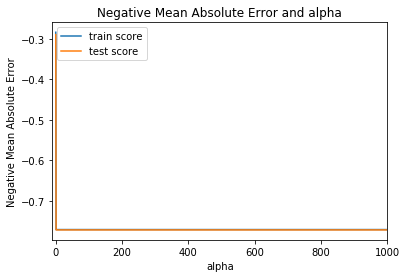

In [93]:
# plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim([ -10,1000])
plt.show()

In [123]:
#by changing the value of alphha we found that alpha 0.7 will be the best fot the tuning
alpha =0.07

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.07, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [124]:
#lets check what all variables are shrinked by the lasso that mean lasso has made those variable coefficient
# to zero
lasso.coef_

array([ 0.11033959,  0.32536019,  0.04484717,  0.09417716, -0.        ,
        0.30937216, -0.        ,  0.11649339,  0.        , -0.1821965 ,
        0.        ,  0.        ,  0.02936083, -0.00104349,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.04075431,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.01652172,  0.        ,  0.        ])

 # Lasso model prediction accuracy and most significant variable 

In [125]:
# check the r^2 of the model on precited variable
y_pred = lasso.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.8398062884501866


In [126]:
# check the r^2 of the model on precited variable
y_pred = lasso.predict(X_test)
mean_squared_error = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mean_squared_error)

0.16861218038494746


In [134]:
pd.Series(lasso.coef_, index=X_train.columns).sort_values(ascending=False)

OverallQual              0.325360
GrLivArea                0.309372
GarageCars               0.116493
LotArea                  0.110340
BsmtFinSF1               0.094177
OverallCond              0.044847
MSZoning_RL              0.029361
SaleType_New             0.016522
2ndFlrSF                -0.000000
KitchenAbvGr            -0.000000
SaleCondition_Normal     0.000000
GarageArea               0.000000
MSZoning_FV              0.000000
MSZoning_RH              0.000000
Neighborhood_Crawfor     0.000000
Neighborhood_StoneBr     0.000000
RoofStyle_Gambrel        0.000000
RoofMatl_Metal           0.000000
RoofMatl_Tar&Grv        -0.000000
SaleCondition_Partial    0.000000
Exterior1st_CBlock      -0.000000
Exterior1st_VinylSd      0.000000
GarageCond_None         -0.000000
GarageQual_None         -0.000000
GarageFinish_None       -0.000000
GarageType_None         -0.000000
Functional_Typ           0.000000
KitchenQual_Gd           0.000000
KitchenQual_Fa          -0.000000
Exterior1st_Br

In [128]:
a=pd.DataFrame(list(zip(X_train.columns,lasso.coef_)))

In [129]:
a.columns=['Name','coef']

In [130]:
b=a.loc[a.coef != 0]

In [131]:
top_features= list(b.Name)

In [132]:
top_features

['LotArea',
 'OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'GrLivArea',
 'GarageCars',
 'NoOFyearsOLd',
 'MSZoning_RL',
 'MSZoning_RM',
 'KitchenQual_TA',
 'SaleType_New']

# Lasso regularization Conclusion : 
   
   ### we were able to built a model with r^2 value 84% and very less mean squred error 16% with alpha value of 0.07 for lasso regularization
   
   ### after performing lasso regularization we were able to find the most impacting feature for the housing price and those feature are 
   These are highly positive impact features
   
     1.OverallQual
     2.GrLivArea
     3..GarageCars
     4.LotArea
     5.BsmtFinSF1
     6.OverallCond
     7.MSZoning_RL
     8.SaleType_New
    
    These are highly positive impact features
     1.NoOFyearsOLd
     2.KitchenQual_TA
     3.MSZoning_RM
   

# Ridge Regularization

In [104]:
# list of alphas to tune
params = {'alpha': [ 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [105]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009368,0.007649,0.0,0.0,0.1,{'alpha': 0.1},-0.208700,-0.210602,-0.218379,-0.217170,...,-0.221041,0.015116,19,-0.208343,-0.205916,-0.204413,-0.204347,-0.201188,-0.204842,0.002332
1,0.003125,0.006250,0.0,0.0,0.2,{'alpha': 0.2},-0.208687,-0.210636,-0.218318,-0.217159,...,-0.221019,0.015093,18,-0.208350,-0.205915,-0.204428,-0.204363,-0.201180,-0.204847,0.002335
2,0.006251,0.007656,0.0,0.0,0.3,{'alpha': 0.3},-0.208676,-0.210669,-0.218258,-0.217148,...,-0.220997,0.015071,17,-0.208360,-0.205914,-0.204442,-0.204377,-0.201173,-0.204853,0.002339
3,0.003125,0.006250,0.0,0.0,0.4,{'alpha': 0.4},-0.208670,-0.210701,-0.218200,-0.217136,...,-0.220977,0.015048,16,-0.208369,-0.205914,-0.204454,-0.204392,-0.201165,-0.204859,0.002344
4,0.003125,0.006250,0.0,0.0,0.5,{'alpha': 0.5},-0.208665,-0.210731,-0.218142,-0.217124,...,-0.220957,0.015026,15,-0.208378,-0.205914,-0.204467,-0.204406,-0.201157,-0.204864,0.002348


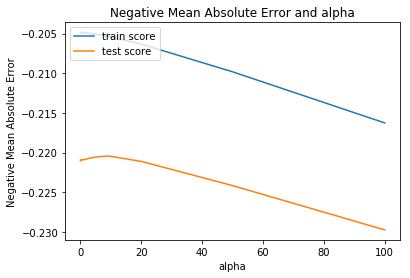

In [106]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [107]:
#tuning the alpha value so that we get the best fit 
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [108]:
#checking the coefficient values
ridge.coef_[0]

array([ 0.11293125,  0.19288043,  0.1252656 ,  0.19547777, -0.10377783,
        0.47274697, -0.06726445,  0.09590159,  0.08505058, -0.24038679,
        0.11607859,  0.05551722,  0.21460704,  0.14423575,  0.05431017,
        0.03981942,  0.00883738,  0.0116305 , -0.0280258 , -0.04788606,
       -0.00646621,  0.0689845 , -0.07323804,  0.00146534,  0.00146534,
        0.08525109, -0.02135681, -0.02242021,  0.01061493, -0.06506036,
       -0.13383001, -0.17163208,  0.06052872,  0.01697552,  0.01697552,
        0.01697552,  0.01697552,  0.12903156,  0.06770187, -0.039697  ])

In [109]:
#check the r^2 value of the ridege regularization model
y_pred = ridge.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.8613003310707956


In [110]:
#checking the mean squared error for the ridge regularization model
y_pred = lasso.predict(X_test)
mean_squared_error = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mean_squared_error)

0.16861218038494746


In [133]:
# find  the feature name with the rigde coefficient
pd.Series(ridge.coef_[0], index=X_train.columns).sort_values(ascending=False)

GrLivArea                0.472747
MSZoning_RL              0.214607
BsmtFinSF1               0.195478
OverallQual              0.192880
MSZoning_RM              0.144236
SaleType_New             0.129032
OverallCond              0.125266
MSZoning_FV              0.116079
LotArea                  0.112931
GarageCars               0.095902
BsmtFinType1_Unf         0.085251
GarageArea               0.085051
Exterior1st_VinylSd      0.068984
SaleCondition_Normal     0.067702
Functional_Typ           0.060529
MSZoning_RH              0.055517
Neighborhood_Crawfor     0.054310
Neighborhood_StoneBr     0.039819
GarageFinish_None        0.016976
GarageQual_None          0.016976
GarageType_None          0.016976
GarageCond_None          0.016976
RoofMatl_Metal           0.011630
Heating_Wall             0.010615
RoofStyle_Gambrel        0.008837
BsmtFinType1_None        0.001465
BsmtQual_None            0.001465
Exterior1st_CBlock      -0.006466
Heating_Grav            -0.021357
Heating_OthW  

# Ridge regularization Conclusion : 
   
   ### we were able to built a model with r^2 value 86% and very less mean squred error 16% with alpha value of 10 for ridge regularization
   
   ### after performing ridge regularization we were able to find the most impacting feature for the housing price and those feature are 
   These are highly positive impact features
   
     1.GrLivArea                
     2.MSZoning_RL
     3.BsmtFinSF1 
     4.BsmtFinSF1
     5.MSZoning_RM
     6.SaleType_New
     7.OverallCond
     
   These are highly negative impact features
   
     1.NoOFyearsOLd            
     2.KitchenQual_TA,
     3.KitchenQual_Gd,
     4.2ndFlrSF 
     5.Exterior2nd_VinylSd
     6.KitchenAbvGr
     7.KitchenQual_Fa

## Alpha Values :

   ### Lasso regularization : 0.07
   ### Ridge regualrization : 10